In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import functions notebook and load data set here
from function_notebook_1 import *

In [3]:
df = pd.read_csv('data/regularseason15.csv').drop('Unnamed: 0', axis = 1)
df2 = pd.read_csv('data/postseason15.csv').drop(['Unnamed: 0','w_loc'], axis = 1)

df2['w_loc_H'] = 0
df2['w_loc_N'] = 1


In [4]:
df = pd.get_dummies(df, columns=['w_loc'], drop_first=True)
df

,W_TeamID,W_Score,W_FGM,W_FGA,W_FGM3,W_FGA3,W_FTM,W_FTA,W_OR,W_DR,...,L_Opp_3Pr,L_Opp_TR,L_Opp_ATOr,L_Opp_Ast_%,L_Opp_Stl_%,L_Opp_Blk_%,L_Opp_TO_r,fav_win,w_loc_H,w_loc_N
0,1102.0,78.000000,31.000000,62.000000,6.000000,19.000000,10.000000,15.000000,15.000000,17.000000,...,0.484140,31.000000,0.923077,0.461538,0.047281,0.095238,0.178326,True,0,1
1,1119.0,84.000000,30.000000,61.000000,13.000000,25.000000,11.000000,17.000000,17.000000,20.000000,...,0.076263,22.000000,0.909091,0.434783,0.082305,0.017241,0.173365,True,0,1
2,1129.0,81.000000,23.000000,49.000000,6.000000,17.000000,29.000000,44.000000,10.000000,26.000000,...,0.278940,28.000000,5.333333,0.571429,0.092654,0.056604,0.040161,True,0,0
3,1181.0,113.000000,42.000000,69.000000,16.000000,31.000000,13.000000,16.000000,17.000000,29.000000,...,0.225904,35.000000,1.500000,0.631579,0.039591,0.036364,0.107527,True,0,0
4,1218.0,85.000000,31.000000,67.000000,8.000000,24.000000,15.000000,20.000000,18.000000,28.000000,...,0.272109,31.000000,1.272727,0.388889,0.055646,0.053333,0.110887,True,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5144,1209.0,71.677419,25.774194,53.806452,4.774194,14.774194,15.354839,20.903226,9.290323,23.322581,...,0.323617,35.925926,0.748718,0.494078,0.067551,0.051896,0.188315,True,0,1
5145,1246.0,74.818182,26.000000,55.606061,5.393939,15.666667,17.424242,24.181818,12.909091,25.424242,...,0.267057,35.424242,0.775472,0.514393,0.066270,0.046328,0.194013,True,0,1
5146,1374.0,69.645161,24.870968,51.096774,4.322581,11.806452,15.580645,22.258065,11.129032,25.032258,...,0.297412,32.363636,0.972752,0.515152,0.078420,0.070431,0.153054,True,0,1
5147,1433.0,72.529412,24.941176,59.411765,8.029412,23.558824,14.617647,22.264706,12.382353,22.911765,...,0.282011,32.406250,0.887356,0.545969,0.073172,0.073482,0.184010,True,0,1


In [5]:
X_train=df.drop('fav_win',axis=1)
X_test=df2.drop('fav_win',axis=1)
y_train=df['fav_win']
y_test = df2['fav_win']

In [6]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [7]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Logistic Regression

In [8]:
log_feat=feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)
X_train_best_log = X_train_scaled[log_feat]
X_test_best_log = X_test_scaled[log_feat]

Penalty: l2
Solver: saga
Mean Cross-Val Score: 0.8434725013445045
Train Mean Accuracy: 0.8527869489221208
Test Mean Accuracy: 0.8208955223880597
Recall Score: 0.9782608695652174
Precision Score: 0.8035714285714286
F1 Score: 0.8823529411764706


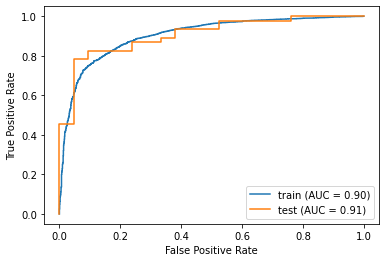

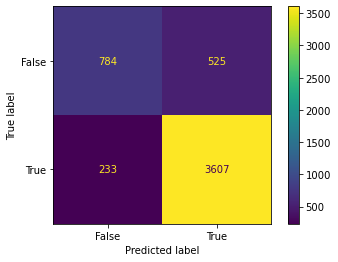

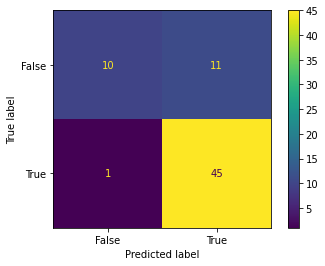

In [9]:
logreg(X_train_best_log, X_test_best_log, y_train, y_test)

### KNN

In [10]:
#knn(X_train_scaled, X_test_scaled, y_train, y_test)

### Decision Tree

In [11]:
#dtree_feats=feature_select(X_train_scaled,y_train,DecisionTreeClassifier,min_features=10)

In [12]:
#X_train_best_dtree=X_train[dtree_feats]
#X_test_best_dtree=X_test[dtree_feats]

In [13]:
#dtree(X_train_best_dtree, X_test_best_dtree, y_train, y_test)

### Random Forest

In [14]:
random_forest_feat=feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_rforest=X_train_scaled[random_forest_feat]
X_test_best_rforest=X_test_scaled[random_forest_feat]

Number of Trees: 90
Criterion: entropy
Mean Cross-Val Score: 0.844442054214196
Train Mean Accuracy: 1.0
Test Mean Accuracy: 0.7313432835820896
Recall Score: 0.9565217391304348
Precision Score: 0.7333333333333333
F1 score: 0.8301886792452831


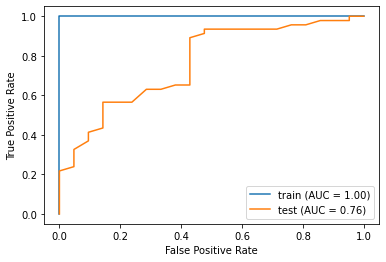

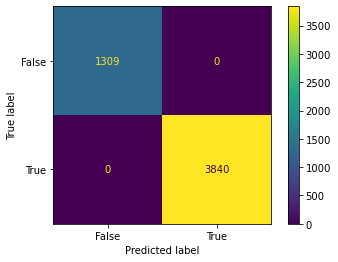

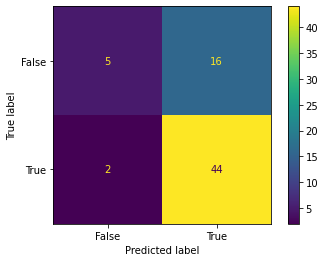

In [15]:
random_forest(X_train, X_test, y_train, y_test, cv=5)

### Bagging Classifier

In [16]:
#bagged(X_train, X_test, y_train, y_test, cv=5)

### XGboost

XGBoost Learning Rate: 0.1
XGBoost Max Depth: 4
XGBoost Min Child Weight: 3
XGBoost Subsample: 1
XGBoost Estimators: 500
Mean Cross-Val Score: 0.8677501957787275
Train Mean Accuracy Score: 1.0
Test Mean Accuracy Score: 0.7761194029850746
Recall Score: 0.9130434782608695
Precision Score: 0.7924528301886793
F1 score: 0.8484848484848485


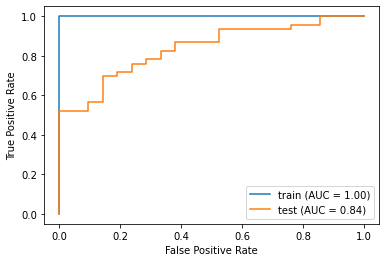

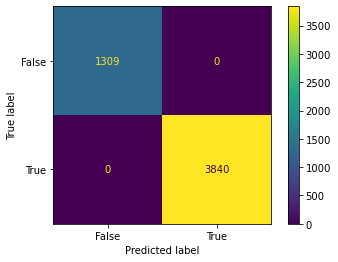

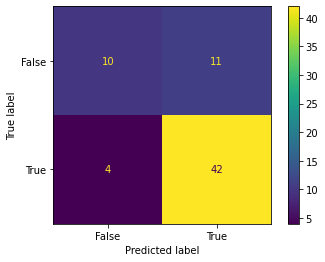

In [17]:
xgboost(X_train, X_test, y_train, y_test, cv=5)